In [1]:
import cv2
import matplotlib.pyplot as plt
import os

In [2]:
path = './grape_base/sample/'
images_paths = os.listdir(path)
images_paths = [path+image for image in images_paths]

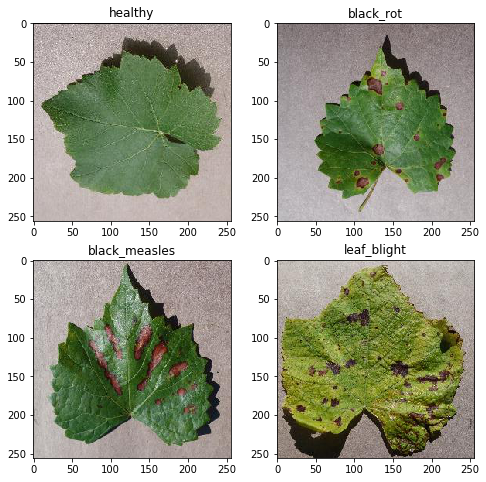

In [3]:
imgs = []
plt.figure(figsize=(8,8))

for i in range(len(images_paths)):
    img = cv2.imread(images_paths[i])
    plt.subplot(2,2,i+1)
    plt.imshow(img[:,:,::-1])
    plt.title(images_paths[i][20:-4])

plt.show()

In [ ]:
Black rot
Black measles
Leaf blight

In [4]:
def plot_BGR(img_path):
    img = cv2.imread(img_path)

    B = img[:,:,0]
    G = img[:,:,1]
    R = img[:,:,2]

    plt.figure(figsize=(16,16))
    plt.subplot(1,4,1)
    plt.title('Original')
    plt.imshow(img[:,:,::-1])

    plt.gray()
    plt.subplot(1,4,2)
    plt.title('Matriz B')
    plt.imshow(B)

    plt.subplot(1,4,3)
    plt.title('Matriz G')
    plt.imshow(G)

    plt.subplot(1,4,4)
    plt.title('Matriz R')
    plt.imshow(R)
    
    plt.show()
    plt.close('all')

In [5]:
def plot_HSV(img_path):
    img = cv2.imread(img_path)

    plt.figure(figsize=(16,16))
    plt.subplot(1,4,1)
    plt.title('Original')
    plt.imshow(img[:,:,::-1])
    
    img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV) 
    H = img[:,:,0]
    S = img[:,:,1]
    V = img[:,:,2]

    plt.gray()
    plt.subplot(1,4,2)
    plt.title('matriz H')
    plt.imshow(H) #matiz refletância do objeto

    plt.subplot(1,4,3)
    plt.title('matriz S')
    plt.imshow(S) #saturação quão longe os pixels estão do branco(ou preto)

    plt.subplot(1,4,4)
    plt.title('matriz V')
    plt.imshow(V) #brilho
    
    plt.show()
    plt.close('all')

>## Imagens RGB

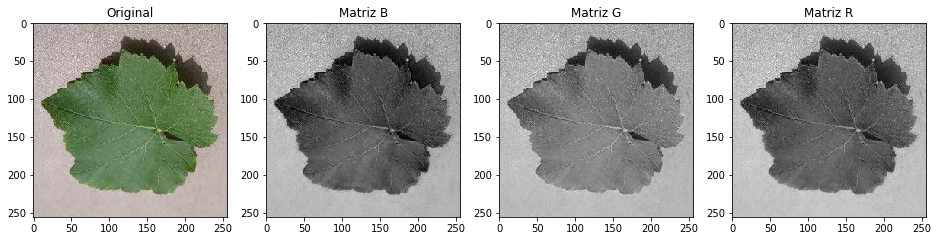

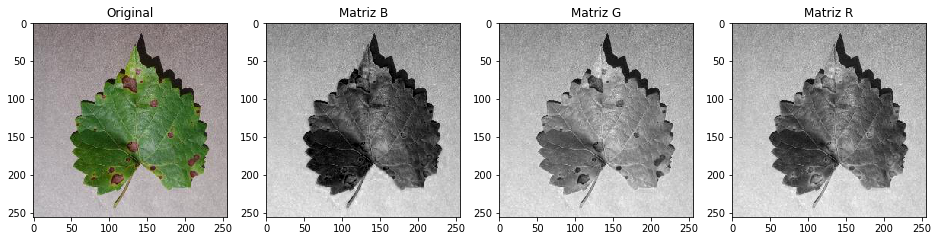

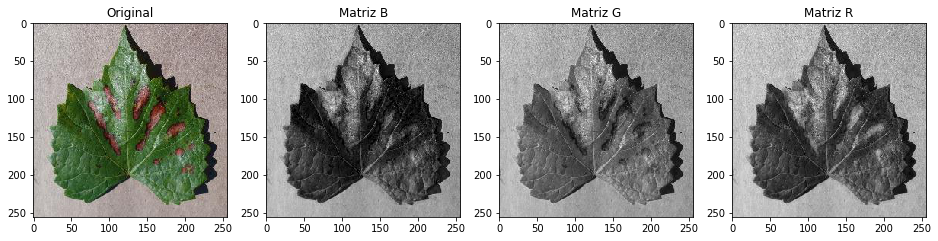

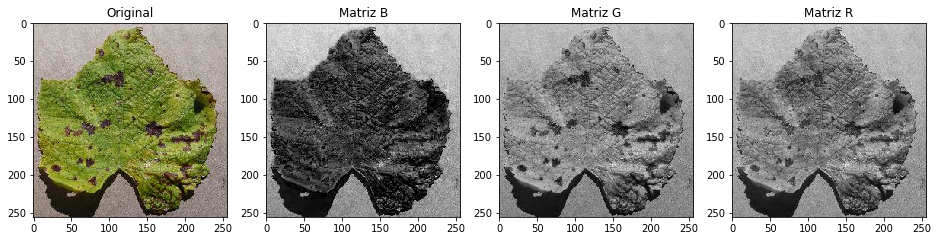

In [6]:
plot_BGR(images_paths[0])
plot_BGR(images_paths[1])
plot_BGR(images_paths[2])
plot_BGR(images_paths[3])

>## Imagens HSV

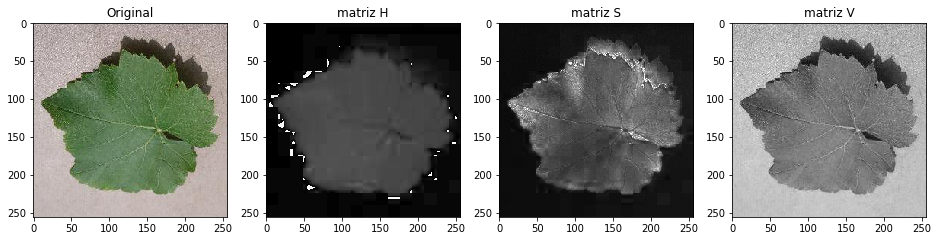

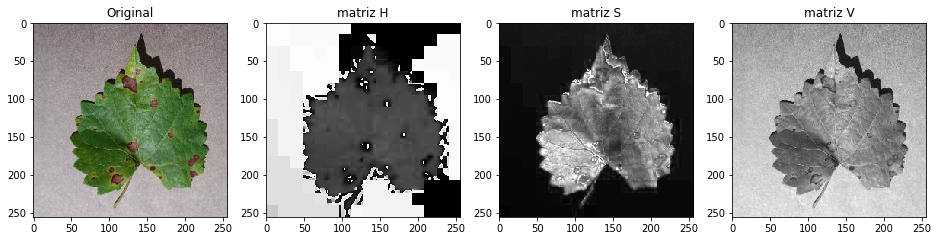

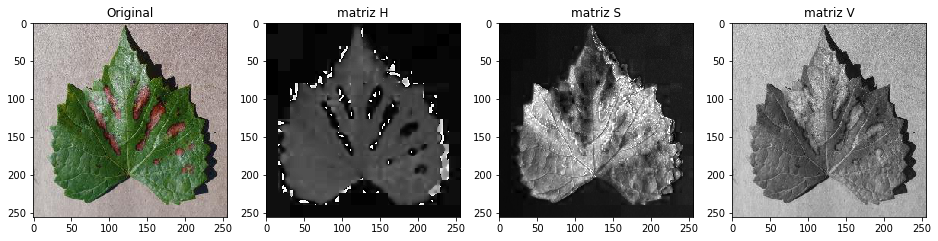

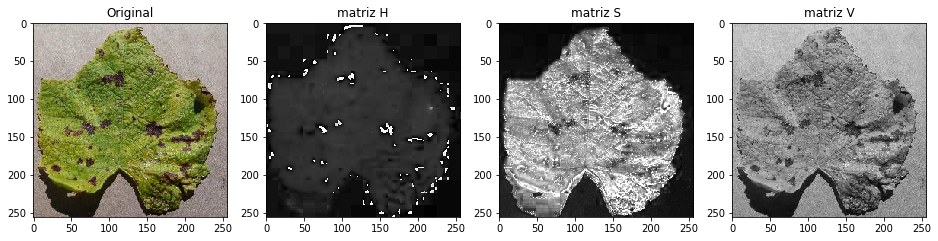

In [7]:
plot_HSV(images_paths[0])
plot_HSV(images_paths[1])
plot_HSV(images_paths[2])
plot_HSV(images_paths[3])

>## Segmentação

A matriz S(HSV) e a matriz B(RGB) demonstram potencial para retirar o fundo da imagem

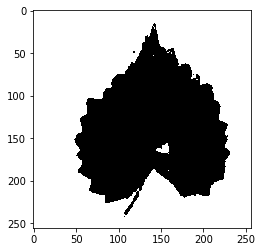

In [161]:
import numpy as np
img = cv2.imread(images_paths[1])

qtdeLinhas, qtdeColunas, c = img.shape
W = np.zeros((qtdeLinhas,qtdeColunas))

img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV) 

H = img[:,:,0]
S = img[:,:,1]
V = img[:,:,2]

for i in range(qtdeLinhas):
    for j in range(qtdeColunas):
        if(S[i,j] < 50):
            W[i,j] = 255

plt.gray()
plt.imshow(W)
plt.show()

>## testando lbp

In [8]:
from visao import lbp

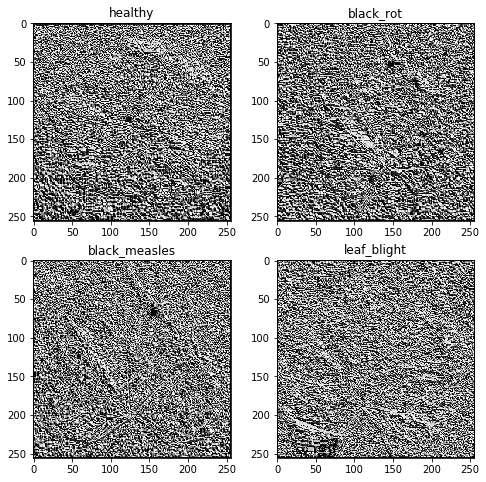

In [9]:
imgs = []
plt.figure(figsize=(8,8))

for i in range(len(images_paths)):
    img = cv2.imread(images_paths[i], 0)
    plt.subplot(2,2,i+1)
    plt.imshow(lbp(img))
    plt.title(images_paths[i][20:-4])

plt.show()

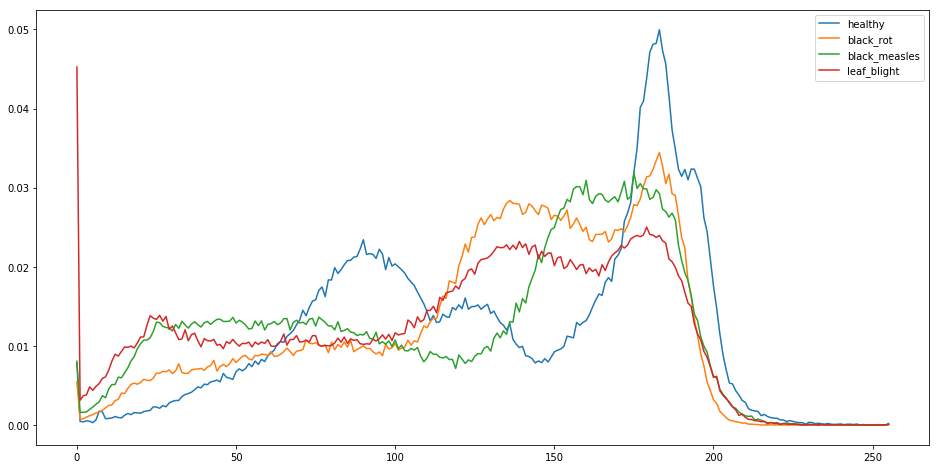

In [11]:
from visao import histograma

imgs = []
plt.figure(figsize=(16,8))

for i in range(len(images_paths)):
    img = cv2.imread(images_paths[i])
    hist = histograma(img)
    plt.plot(hist)

plt.legend([images_paths[0][20:-4], images_paths[1][20:-4], images_paths[2][20:-4], images_paths[3][20:-4]])
plt.show()

>## Metodologia

Exploração do Dataset
Segmentação
Extração de Características
Classificação

In [ ]:
black_measles: 1920
leaf_blight: 1722
black_rot: 1888
healthy: 1692

>## Possíveis Técnicas para Extração de Características

In [ ]:
histograma  
textura (lbp)  
momentos de ru  
palavras(sift)